In [4]:
from dal_toolbox import datasets
import matplotlib.pyplot as plt
import numpy as np
from dal_toolbox.datasets.cifar import CIFAR10ContrastiveTransforms

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


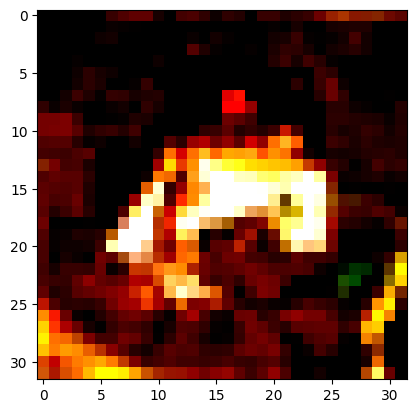

In [5]:
data = datasets.CIFAR10("baselines/active_learning/data")
plt.imshow(data.full_train_dataset_eval_transforms[0][0].permute(1, 2, 0))

In [6]:
data = datasets.SVHN("misc/self_supervised_learning/data")

Using downloaded and verified file: misc/self_supervised_learning/data\train_32x32.mat
Using downloaded and verified file: misc/self_supervised_learning/data\test_32x32.mat


[ 4948 13861 10585  8497  7458  6882  5727  5595  5045  4659]


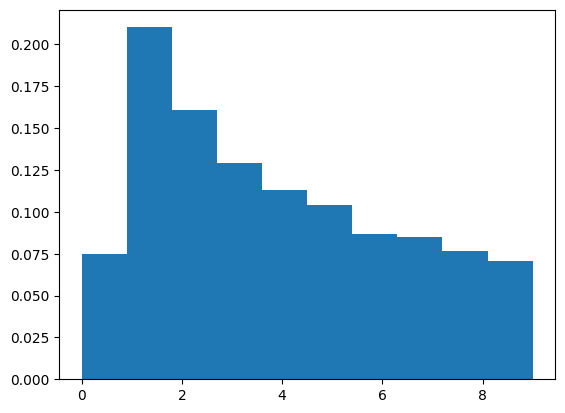

In [7]:
dist = np.unique(data.full_train_dataset.labels, return_counts=True)[1]
print(dist)
plt.hist(data.full_train_dataset.labels, density=True)
plt.show()

[1744 5099 4149 2882 2523 2384 1977 2019 1660 1595]


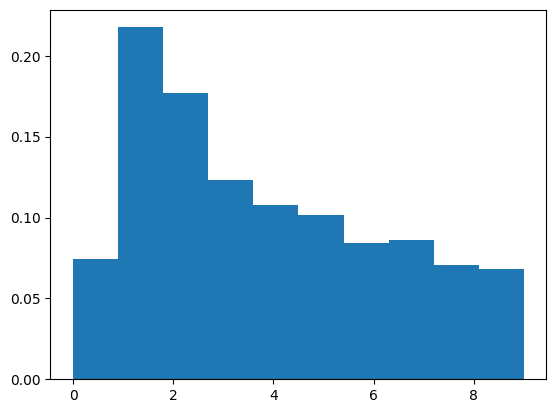

In [8]:
dist = np.unique(data.test_dataset.labels, return_counts=True)[1]
print(dist)
plt.hist(data.test_dataset.labels, density=True)
plt.show()

In [9]:
data = datasets.ImageNet100("E:\ILSVRC2012")

Loading train split of ImageNet imagenet_100.txt
Loading val split of ImageNet imagenet_100.txt


[1300 1300 1300 1300 1300 1300 1300 1300 1300 1300 1300 1300  860 1136
 1300 1300 1300 1300 1300 1300 1300 1300 1300 1300 1300 1300 1300 1300
 1300 1300 1300 1300 1300 1300 1300 1300 1300 1300 1300 1292 1300 1300
 1300 1300 1300 1300 1300 1300 1300 1300 1300 1300 1300 1300  891 1300
 1300 1300 1300 1300 1300 1300 1300 1180 1300 1300 1300 1300 1300 1300
 1270 1300 1300 1300 1300 1300 1300 1300 1153 1300 1300 1300 1300 1300
 1250 1300 1300 1300 1300 1300 1300 1213 1300 1300 1300 1300 1300 1300
 1300 1300]


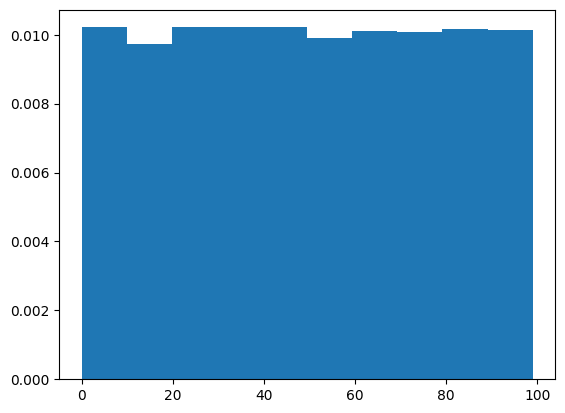

In [10]:
dist = np.unique([label for _, label in data.full_train_dataset.imgs], return_counts=True)[1]
print(dist)
plt.hist([label for _, label in data.full_train_dataset.imgs], density=True)
plt.show()

[50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50]


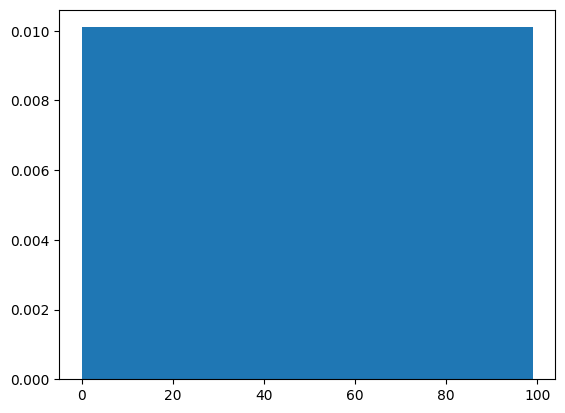

In [11]:
dist = np.unique([label for _, label in data.test_dataset.imgs], return_counts=True)[1]
print(dist)
plt.hist([label for _, label in data.test_dataset.imgs], density=True)
plt.show()

In [12]:
data = datasets.SVHNContrastive("misc/self_supervised_learning/data", seed=0)
data_wrong_augs = datasets.SVHNContrastive("misc/self_supervised_learning/data", seed=0)
data_wrong_augs.eval_transform = CIFAR10ContrastiveTransforms(0.5).eval_transform
data_wrong_augs.train_transform = CIFAR10ContrastiveTransforms(0.5).train_transform
data_plain = datasets.SVHNPlain("misc/self_supervised_learning/data", seed=0)

Using downloaded and verified file: misc/self_supervised_learning/data\train_32x32.mat
Using downloaded and verified file: misc/self_supervised_learning/data\test_32x32.mat
Using downloaded and verified file: misc/self_supervised_learning/data\train_32x32.mat
Using downloaded and verified file: misc/self_supervised_learning/data\test_32x32.mat
Using downloaded and verified file: misc/self_supervised_learning/data\train_32x32.mat
Using downloaded and verified file: misc/self_supervised_learning/data\test_32x32.mat


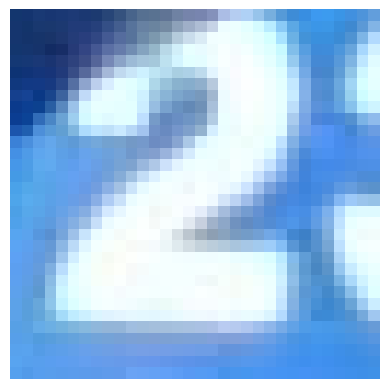

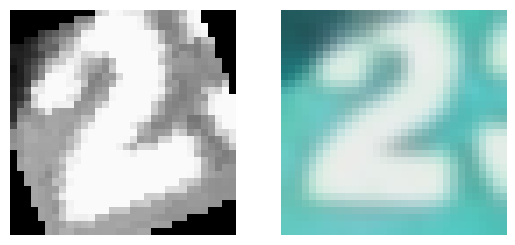

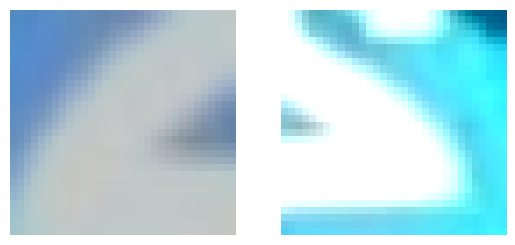

In [22]:
img_idx = 2 # 99,

img = data_plain.full_train_dataset_eval_transforms[img_idx][0].permute(1, 2, 0)
plt.imshow(img)
plt.axis("off")
plt.savefig(f"svhn_exp_original_{img_idx}.pdf", bbox_inches="tight")
plt.show()

for i in range(1):
    fig, axes = plt.subplots(1, 2)
    imgs = data.full_train_dataset_eval_transforms[img_idx][0]
    img1 = imgs[0].permute(1, 2, 0)
    img2 = imgs[1].permute(1, 2, 0)
    axes[0].imshow(img1)
    axes[1].imshow(img2)
    axes[0].axis("off")
    axes[1].axis("off")
    plt.savefig(f"svhn_exp_correct_{img_idx}.pdf", bbox_inches="tight")
    plt.show()

for i in range(1):
    fig, axes = plt.subplots(1, 2)
    imgs = data_wrong_augs.full_train_dataset_eval_transforms[img_idx][0]
    img1 = imgs[0].permute(1, 2, 0)
    img2 = imgs[1].permute(1, 2, 0)
    axes[0].imshow(img1)
    axes[1].imshow(img2)
    axes[0].axis("off")
    axes[1].axis("off")
    plt.savefig(f"svhn_exp_wrong_{img_idx}.pdf", bbox_inches="tight")
    plt.show()

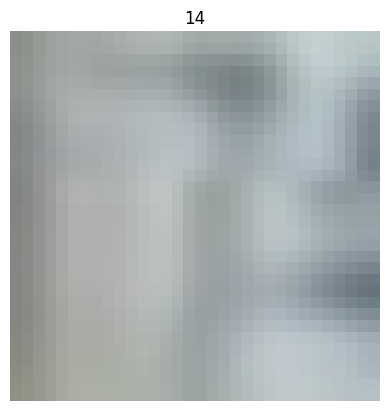

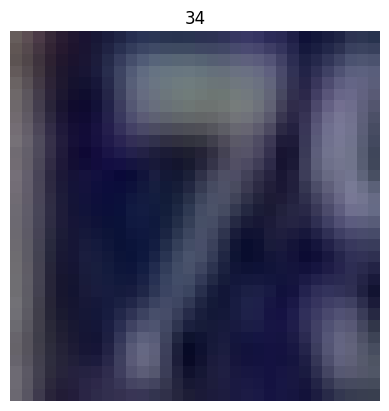

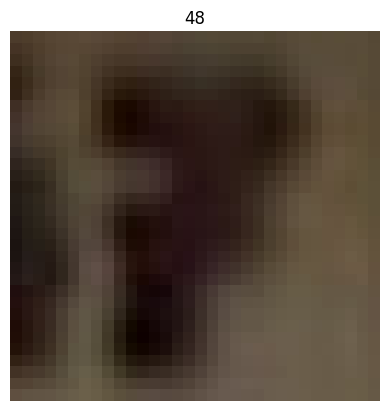

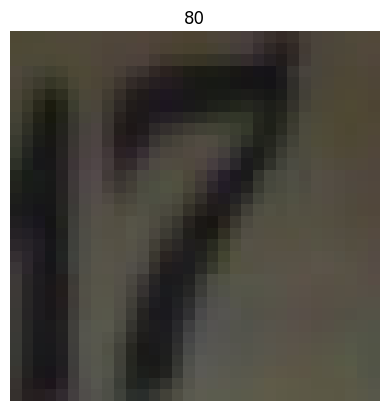

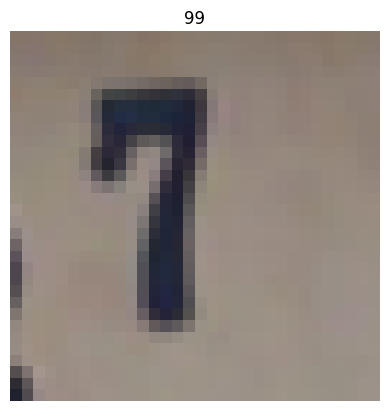

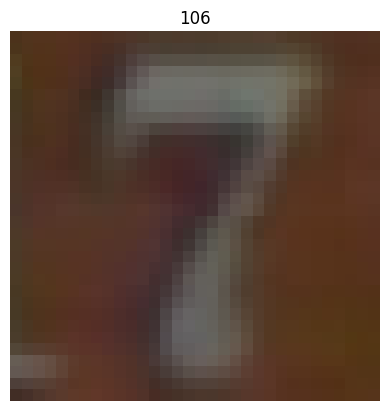

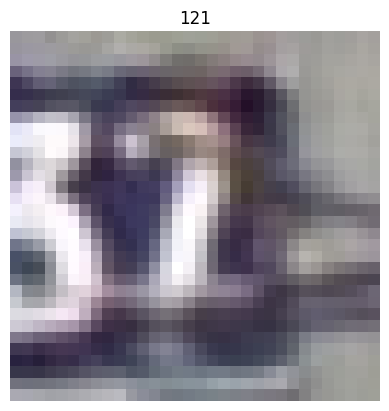

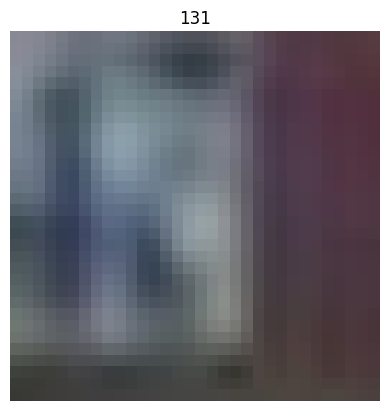

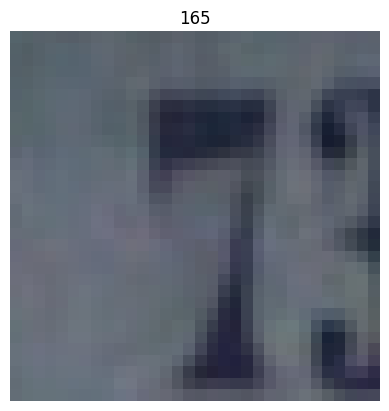

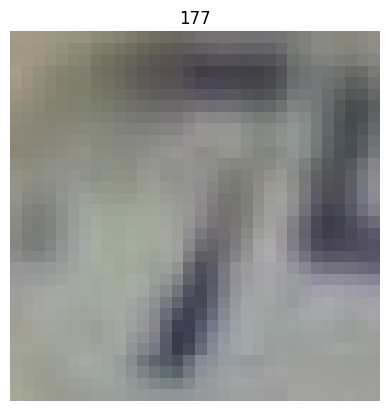

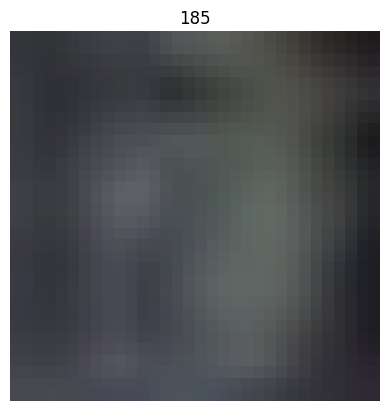

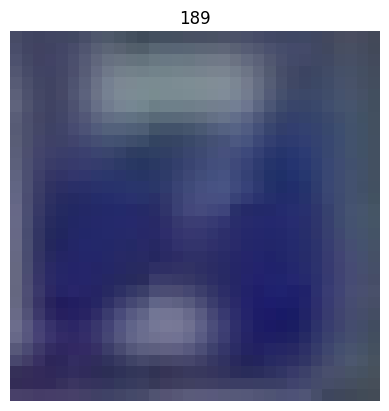

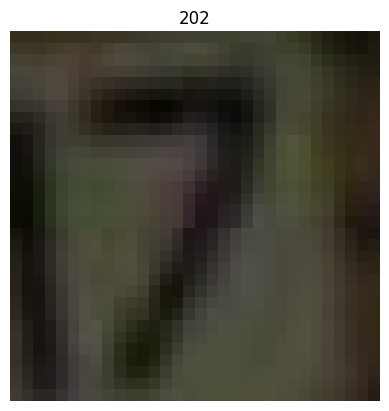

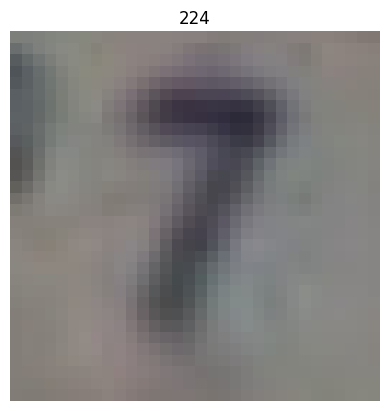

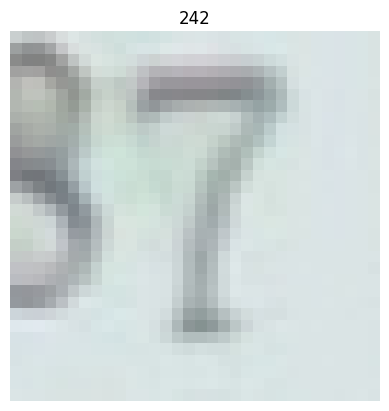

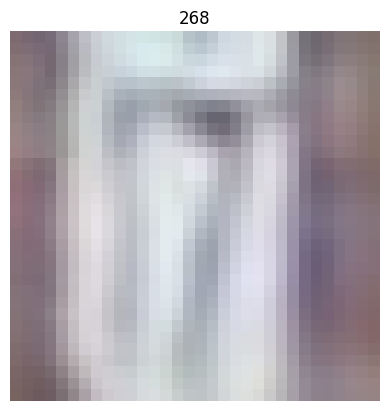

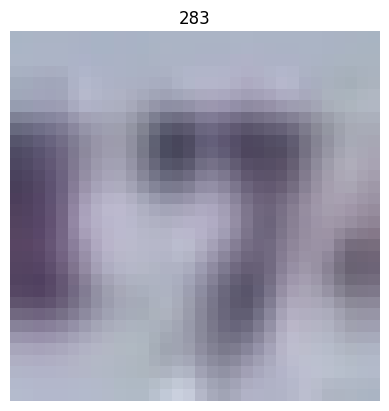

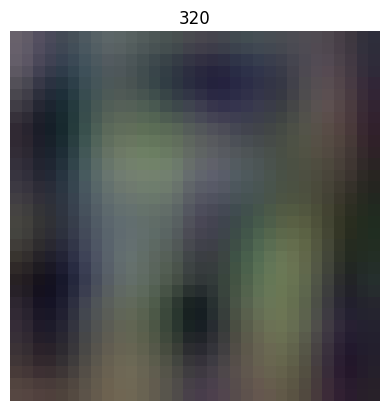

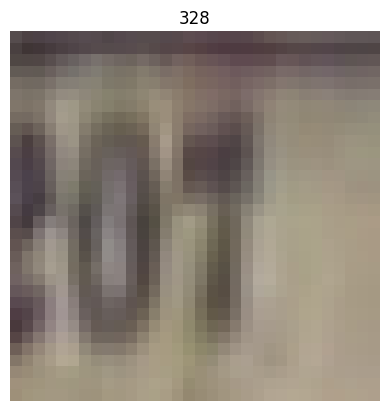

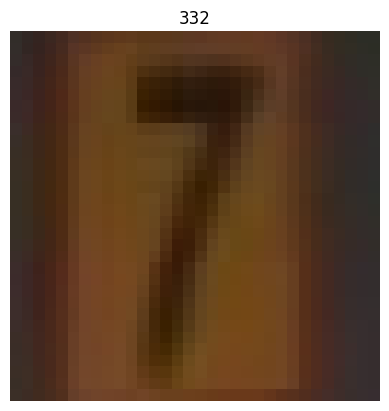

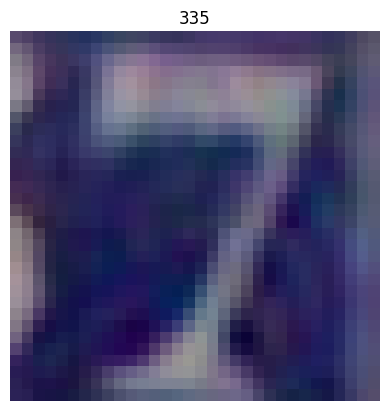

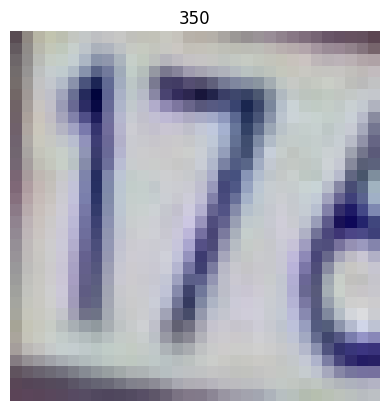

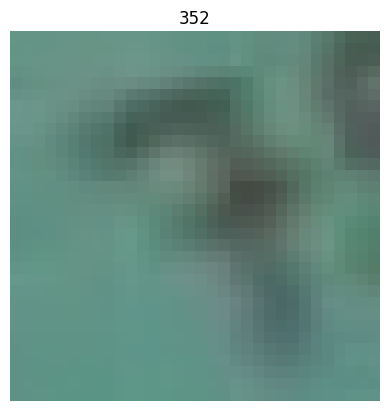

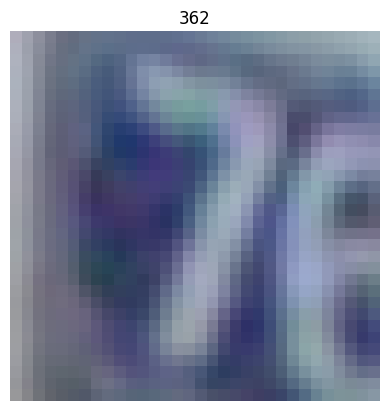

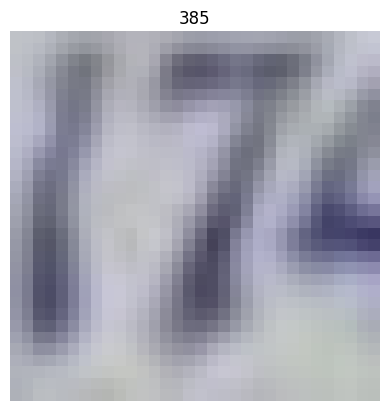

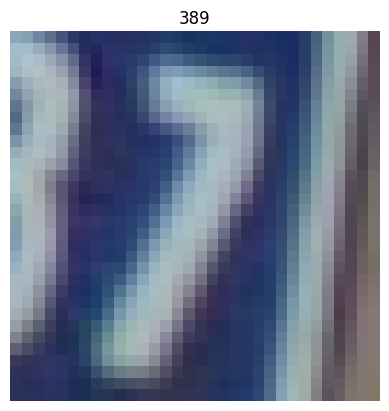

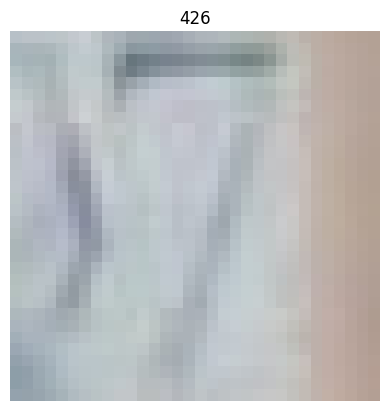

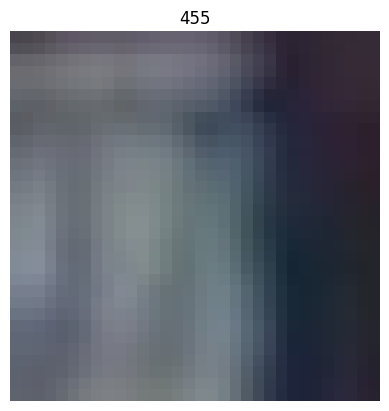

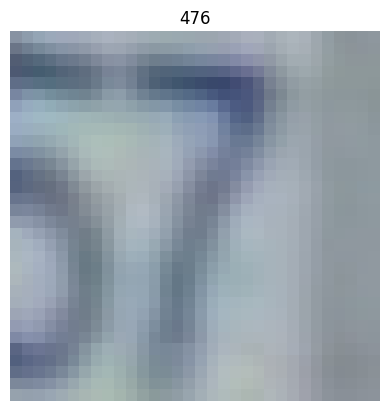

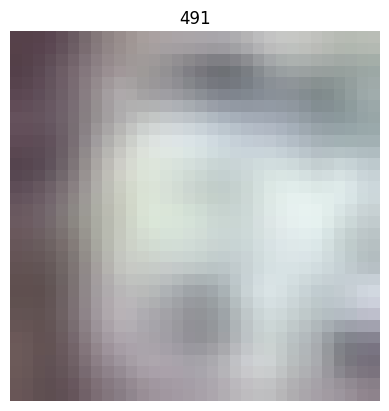

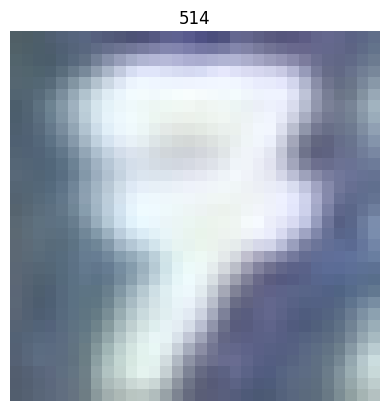

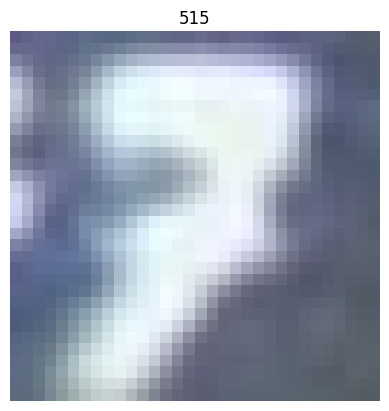

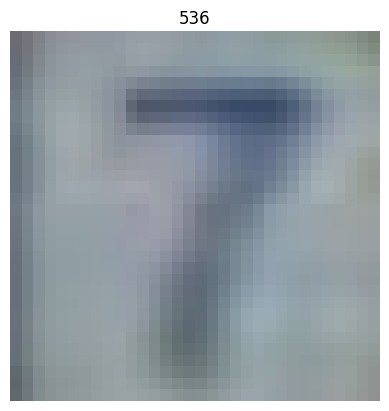

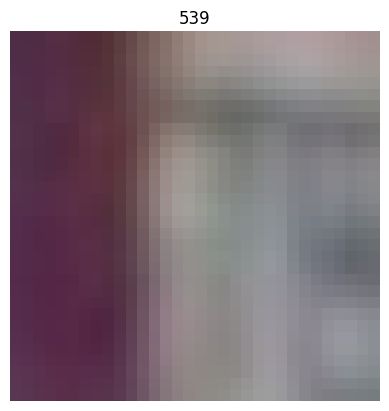

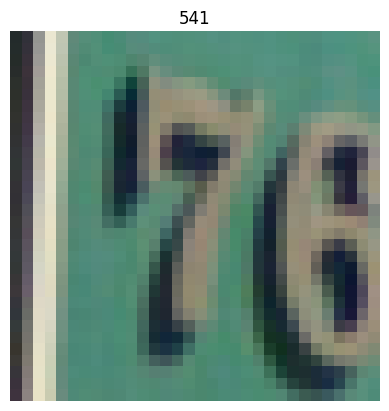

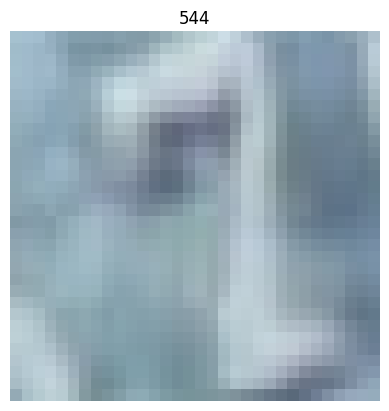

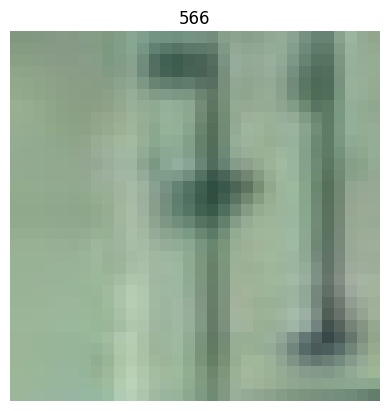

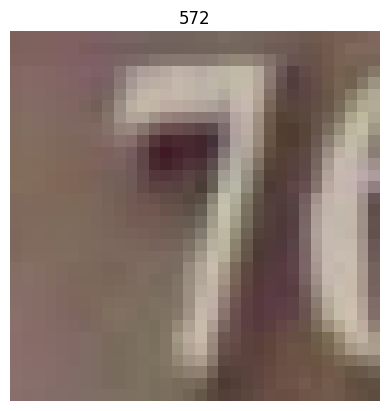

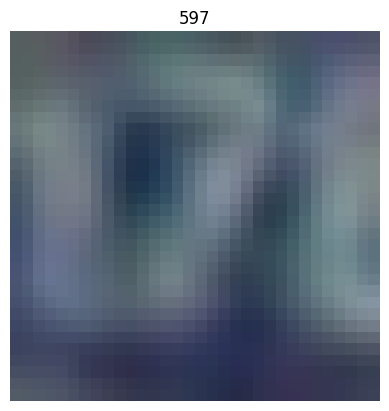

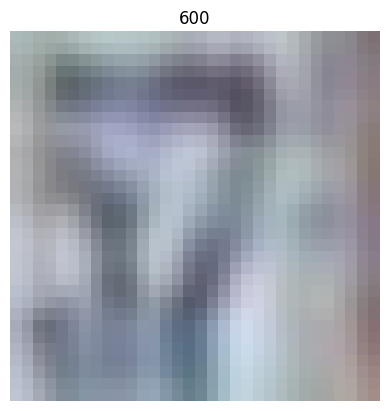

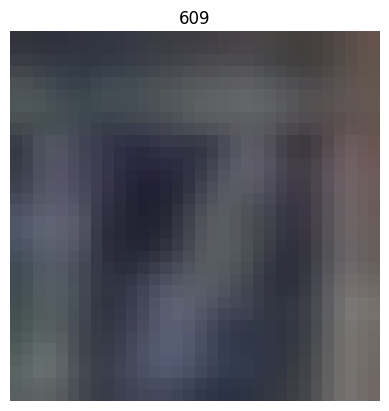

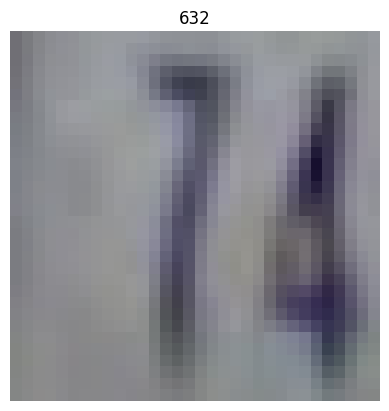

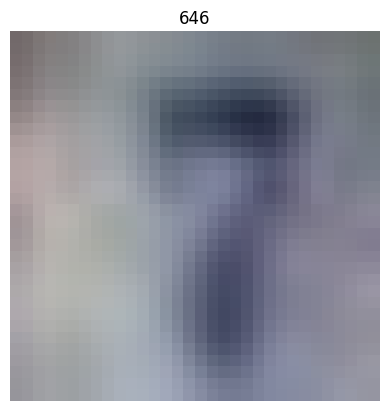

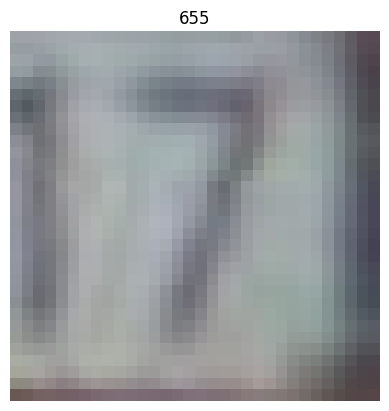

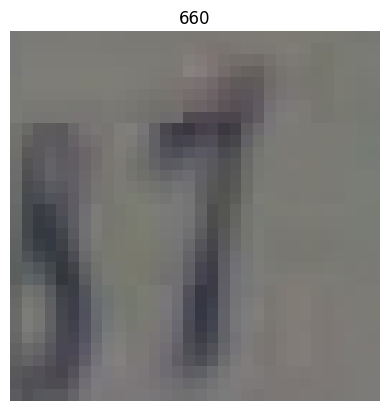

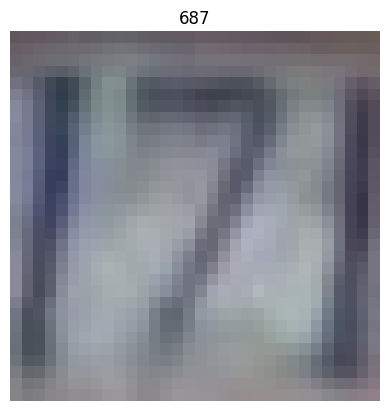

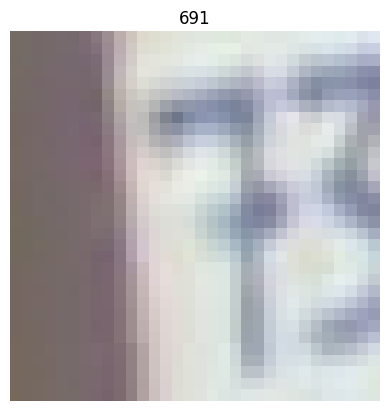

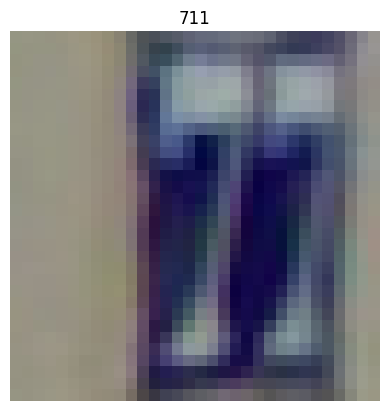

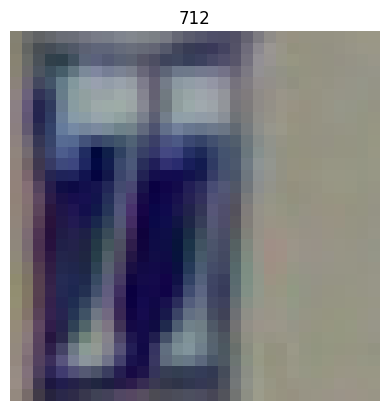

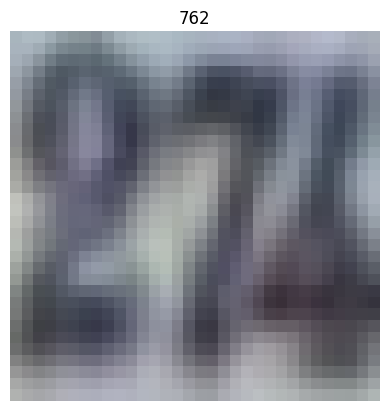

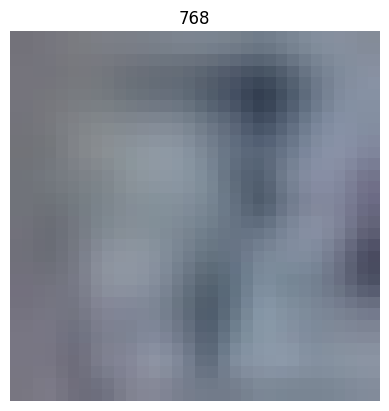

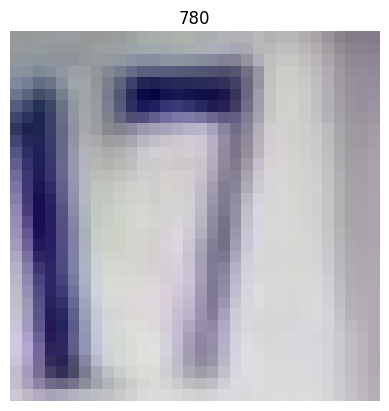

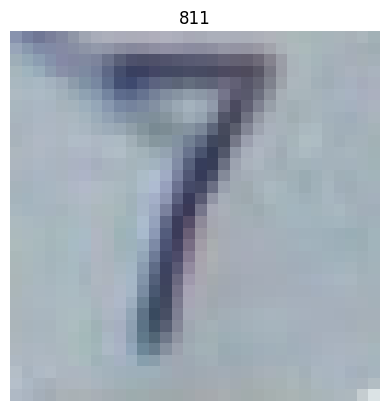

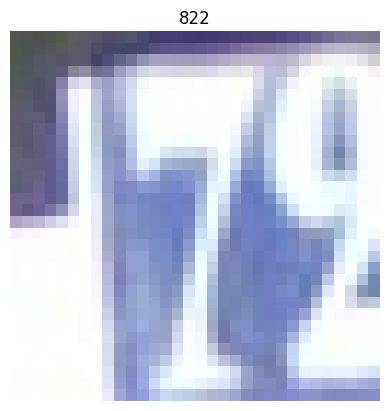

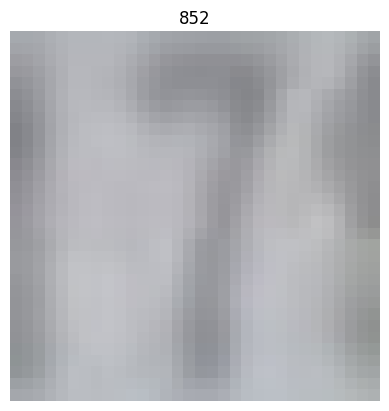

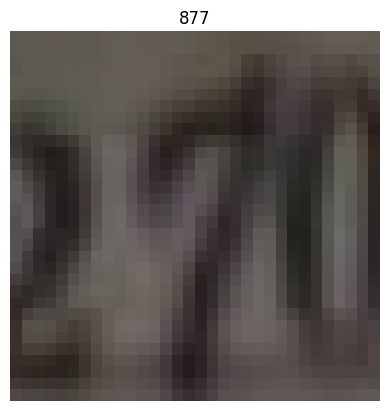

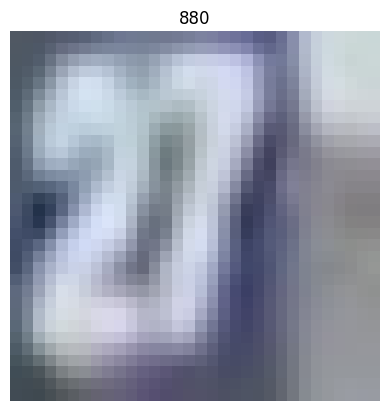

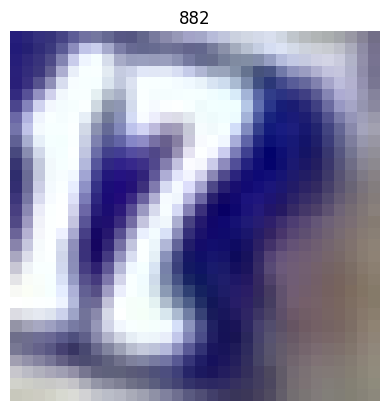

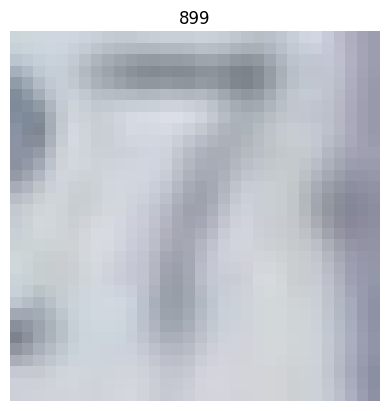

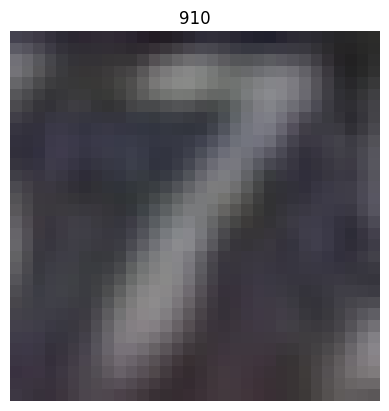

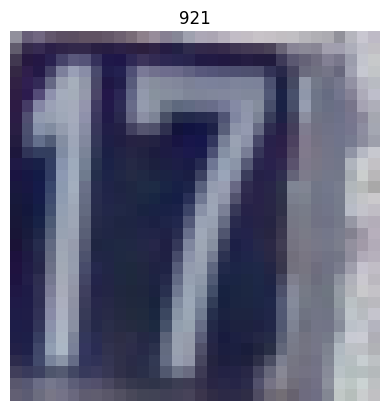

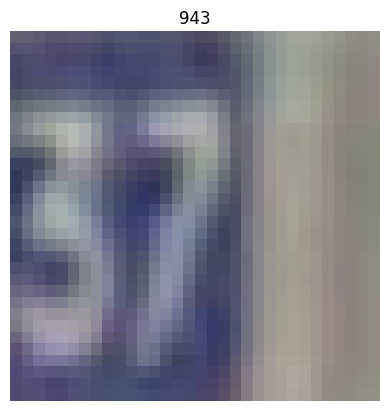

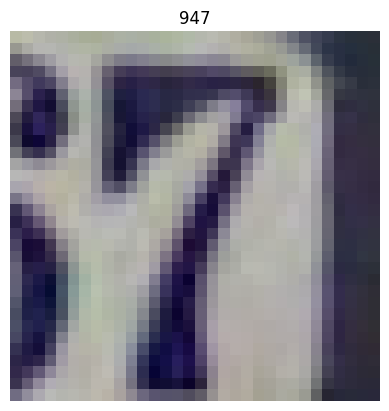

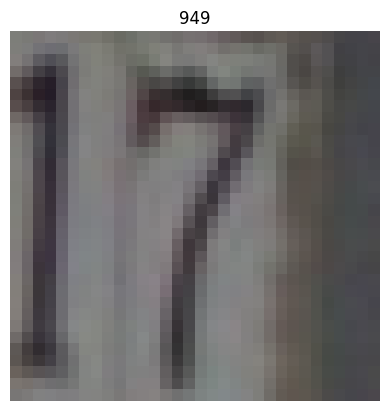

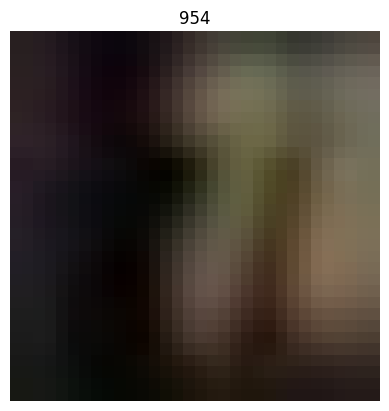

In [58]:
for idx, (img, label) in enumerate(data_plain.full_train_dataset_eval_transforms):
    if label != 7:
        continue
    if idx > 1000:
        break
    plt.imshow(img.permute(1, 2, 0))
    plt.axis("off")
    plt.title(idx)
    plt.show()